In [78]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
!pip install geopandas --upgrade --quiet 
import geopandas as gpd


<ul style="list-style-type:none; text-align: center;">
    <li style="font-size:36px;"> <b>Data Cleaning and Preparation</b></li>
</ul>

<p></p>
<p style="font-size:20px;"> <b>Dengue Data</b>

In [79]:
#import dengue data
csv_filepath = '/Users/pranav/Documents/Dengue vs Covid/2007-2020_sg_serospecific_copy.csv'
dengue = pd.read_csv(csv_filepath, sep = ',')

#Create copy of dengue data
dengue_data = dengue.copy()
dengue_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1264 entries, 0 to 1263
Columns: 734 entries, Unnamed: 0 to 2020 EW52
dtypes: object(734)
memory usage: 7.1+ MB


/var/folders/vc/pwq7lk4d1ms850fh8n8q0gym0000gn/T/ipykernel_1590/2357056389.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  dengue = pd.read_csv(csv_filepath, sep = ',')


In [80]:
dengue_data.head(5)

,Unnamed: 0,EYEW,2007 EW1,2007 EW2,2007 EW3,2007 EW4,2007 EW5,2007 EW6,2007 EW7,2007 EW8,...,2020 EW43,2020 EW44,2020 EW45,2020 EW46,2020 EW47,2020 EW48,2020 EW49,2020 EW50,2020 EW51,2020 EW52
0,NaN,Eyear,2007,2007,2007,2007,2007,2007,2007,2007,...,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020
1,NaN,Eweek,1,2,3,4,5,6,7,8,...,43,44,45,46,47,48,49,50,51,52
2,StudyArea,Sector_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,CO433,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,NaN,CO1,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-



<p style="font-size:20px;"> <b>Tasks</b></p> 
   
<ul style="list-style-type:decimal;font-size:15px;">
    <li> Remove first column, remove Eyear,Eweek and Sector_ID rows (assuming we are getting rid of time series) </li>
    <p></p>
    <li> Rename 'EYEW' header to 'Sector_ID'</li>
    <p></p>
    <li> Create 'Case_counts' column for aggregated count values</li>
    <p></p>
 </ul>

    

In [81]:
#Task 1
dengue_data.drop(columns=['Unnamed: 0'], inplace = True)
dengue_data.drop([0,1,2], inplace = True)

#Task 2
dengue_data.rename(columns = {'EYEW' :'Sector_ID'}, inplace = True)

#Task 3
dengue_data.set_index('Sector_ID', inplace= True) #Remove parse error and set up df for merging on index
dengue_data = dengue_data.apply(pd.to_numeric, errors = 'coerce')
dengue_data['Case_counts'] = dengue_data.sum(axis=1)

dengue_data.sample(10)

,2007 EW1,2007 EW2,2007 EW3,2007 EW4,2007 EW5,2007 EW6,2007 EW7,2007 EW8,2007 EW9,2007 EW10,...,2020 EW44,2020 EW45,2020 EW46,2020 EW47,2020 EW48,2020 EW49,2020 EW50,2020 EW51,2020 EW52,Case_counts
Sector_ID,,,,,,,,,,,,,,,,,,,,,
CO77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0
FL387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0
CO97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0
CO37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
CO220,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0
FL727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,168.0
FL671,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88.0
FL244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.0
FL547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0


In [82]:
dengue_data.Case_counts.describe()

count    1261.000000
mean       58.969865
std        69.155259
min         0.000000
25%        20.000000
50%        44.000000
75%        76.000000
max      1230.000000
Name: Case_counts, dtype: float64

<Axes: xlabel='Sector_ID'>

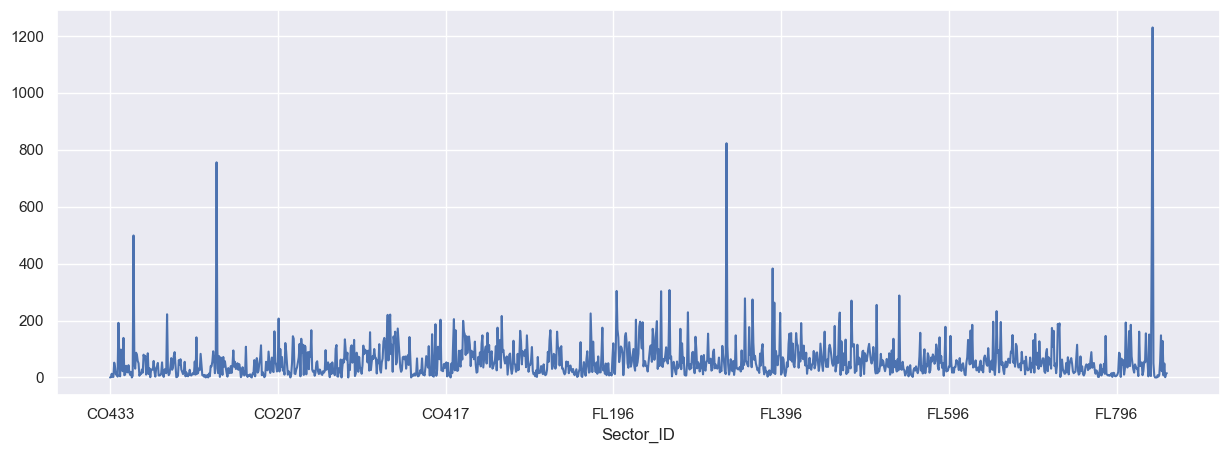

In [83]:
%matplotlib inline
plt.figure(figsize = (15,5))
dengue_data.Case_counts.plot()

<p></p>
<p style="font-size:20px;"> <b>Shapefile</b>

In [84]:
#import shapefile 
shp_filepath = '/Users/pranav/Documents/Dengue vs Covid/Sectorboundary_7Nov2022/Sectorboundary_7Nov2022.shp'
sectors = gpd.read_file(shp_filepath)

sectors_df = sectors.copy()
sectors_df.set_index('Sector_ID', inplace = True) #Prepare for merging
sectors_df.head()

,ROAD_NAME,PremType,geometry
Sector_ID,,,
CO433,Nim Rise / Nim Terrace,Landed,"POLYGON ((31503.320 40145.285, 31285.795 40094..."
CO1,Clementi Rd / Maju Dr,Landed,"POLYGON ((21826.184 34966.804, 21823.621 34822..."
CO2,Denham Cl / Dunearn Rd / Hua Guan Ave / Sian T...,Landed,"POLYGON ((22593.721 36037.419, 22597.703 35985..."
CO3,Bt Sedap Rd / Greenleaf Ln / Greenleaf Rd / Gr...,Landed,"POLYGON ((22876.679 33579.092, 22961.678 33570..."
CO4,Depot Rd / Lock Rd / Preston Rd / Telok Blanga...,Landed,"POLYGON ((25046.569 29318.064, 25059.570 29300..."


In [85]:
sectors_df.PremType.value_counts()

HDB       849
Landed    412
Name: PremType, dtype: int64

In [86]:
print(sectors_df.crs)

None


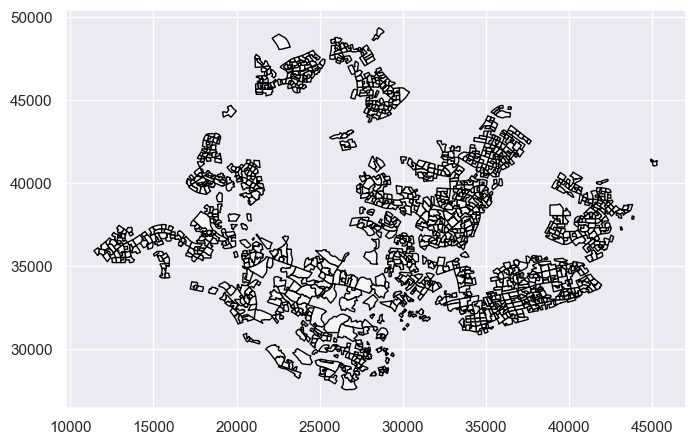

In [87]:
ax = sectors_df.plot(figsize =(8,8),color= 'whitesmoke', edgecolor = 'black', zorder =3)

<p></p>
<p style="font-size:20px;"> <b>Structural Data</b>

In [88]:
# Import structural data file
struct_filepath = '/Users/pranav/Documents/Dengue vs Covid/spattemp_sg_copy.csv'
struct = pd.read_csv(struct_filepath, sep = ',')

struct_df = struct.copy()
struct_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1261 non-null   object 
 1   NDVI_A      1261 non-null   float64
 2   X300m.P     1261 non-null   object 
 3   X500m_P     1261 non-null   object 
 4   V_Density   1261 non-null   object 
 5   A_HDB_H     1261 non-null   object 
 6   A_HDB_A     1261 non-null   object 
 7   a_HDB_P     1261 non-null   object 
 8   D_To_Drain  1261 non-null   float64
 9   length_D    1261 non-null   object 
 10  Forest_P    1261 non-null   object 
 11  Grass_P     1261 non-null   object 
 12  MVege_P     1261 non-null   object 
 13  Building_P  1261 non-null   object 
 14  RU_HDB      1261 non-null   int64  
 15  Condo_n     1261 non-null   int64  
 16  Landed_n    1261 non-null   int64  
dtypes: float64(2), int64(3), object(12)
memory usage: 167.6+ KB


In [89]:
struct_df.rename(columns = {'Unnamed: 0' :'Sector_ID'}, inplace = True)
struct_df.set_index('Sector_ID',inplace =True)
struct_df= struct_df.apply(pd.to_numeric, errors = 'coerce')
struct_df.head()

,NDVI_A,X300m.P,X500m_P,V_Density,A_HDB_H,A_HDB_A,a_HDB_P,D_To_Drain,length_D,Forest_P,Grass_P,MVege_P,Building_P,RU_HDB,Condo_n,Landed_n
Sector_ID,,,,,,,,,,,,,,,,
CO433,0.39,NaN,0.12,0.01,NaN,NaN,NaN,612.56,NaN,NaN,NaN,0.01,0.49,0,0,490
CO1,0.37,0.16,0.64,0.04,NaN,NaN,NaN,388.23,156.96,0.04,0.0,0.00,0.20,0,48,0
CO2,0.37,NaN,NaN,NaN,NaN,NaN,NaN,318.49,51.67,NaN,NaN,NaN,0.33,0,4,720
CO3,0.33,NaN,0.20,0.01,NaN,NaN,NaN,148.34,182.43,0.00,0.0,0.00,0.34,0,32,1495
CO4,0.46,0.60,0.87,0.85,NaN,NaN,NaN,111.95,84.29,0.85,0.0,0.85,0.04,0,0,75


<p></p>
<p style="font-size:20px;"> <b>Merging the Datasets</b>

In [90]:
#Merge between case counts and shapefile
dengue_counts_df = dengue_data['Case_counts']
first_merge_df = sectors_df.merge(dengue_counts_df, left_index = True, right_index=True)
first_merge_df.head()

,ROAD_NAME,PremType,geometry,Case_counts
Sector_ID,,,,
CO433,Nim Rise / Nim Terrace,Landed,"POLYGON ((31503.320 40145.285, 31285.795 40094...",0.0
CO1,Clementi Rd / Maju Dr,Landed,"POLYGON ((21826.184 34966.804, 21823.621 34822...",1.0
CO2,Denham Cl / Dunearn Rd / Hua Guan Ave / Sian T...,Landed,"POLYGON ((22593.721 36037.419, 22597.703 35985...",13.0
CO3,Bt Sedap Rd / Greenleaf Ln / Greenleaf Rd / Gr...,Landed,"POLYGON ((22876.679 33579.092, 22961.678 33570...",2.0
CO4,Depot Rd / Lock Rd / Preston Rd / Telok Blanga...,Landed,"POLYGON ((25046.569 29318.064, 25059.570 29300...",2.0


In [91]:
#Merge between first_merge and struct_df
second_merge_df = first_merge_df.merge(struct_df, left_index = True, right_index = True)

combined_data = second_merge_df.copy()


<ul style="list-style-type:none; text-align: center;">
    <li style="font-size:36px;"> <b>Exploratory Data Analysis</b></li>
</ul></p>

In [92]:
combined_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1261 entries, CO433 to FL848
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   ROAD_NAME    1261 non-null   object  
 1   PremType     1261 non-null   object  
 2   geometry     1261 non-null   geometry
 3   Case_counts  1261 non-null   float64 
 4   NDVI_A       1261 non-null   float64 
 5   X300m.P      670 non-null    float64 
 6   X500m_P      920 non-null    float64 
 7   V_Density    693 non-null    float64 
 8   A_HDB_H      854 non-null    float64 
 9   A_HDB_A      854 non-null    float64 
 10  a_HDB_P      846 non-null    float64 
 11  D_To_Drain   1261 non-null   float64 
 12  length_D     309 non-null    float64 
 13  Forest_P     92 non-null     float64 
 14  Grass_P      220 non-null    float64 
 15  MVege_P      693 non-null    float64 
 16  Building_P   1260 non-null   float64 
 17  RU_HDB       1261 non-null   int64   
 18  Condo_n      1261 no

In [94]:
combined_data.sample(5)

,ROAD_NAME,PremType,geometry,Case_counts,NDVI_A,X300m.P,X500m_P,V_Density,A_HDB_H,A_HDB_A,a_HDB_P,D_To_Drain,length_D,Forest_P,Grass_P,MVege_P,Building_P,RU_HDB,Condo_n,Landed_n
Sector_ID,,,,,,,,,,,,,,,,,,,,
CO125,Carpmael Rd / Crane Rd / Geylang Rd / Joo Chia...,Landed,"POLYGON ((35212.567 32685.485, 35210.147 32683...",66.0,0.35,NaN,0.27,0.04,NaN,NaN,NaN,85.01,478.32,NaN,0.04,0.02,0.39,0,24,280
FL106,Commonwealth Dr / Tanglin Halt Rd,HDB,"POLYGON ((24116.672 31630.346, 24232.541 31527...",15.0,0.37,0.04,0.99,0.00,51.33,12.33,1958268.50,167.43,NaN,NaN,0.00,0.00,0.29,4840,0,0
FL378,Upper Serangoon View,HDB,"POLYGON ((35871.165 39838.088, 35862.444 39835...",20.0,0.30,1.00,1.00,NaN,46.80,7.60,359075.00,754.80,NaN,NaN,NaN,NaN,0.16,1988,0,0
FL262,Woodlands Ave 1 / Woodlands Ave 5 / Woodlands ...,HDB,"POLYGON ((22994.797 46238.344, 22988.873 46213...",121.0,0.27,NaN,NaN,0.28,29.00,26.89,4785332.50,580.04,NaN,NaN,NaN,0.28,0.21,2400,0,0
FL62,Lor 7 Toa Payoh / Lor 8 Toa Payoh,HDB,"POLYGON ((30947.146 35574.206, 30947.302 35443...",216.0,0.35,0.49,1.00,NaN,42.30,36.00,484982.12,352.55,NaN,NaN,NaN,NaN,0.23,12508,0,0


In [95]:
combined_data.describe()

,Case_counts,NDVI_A,X300m.P,X500m_P,V_Density,A_HDB_H,A_HDB_A,a_HDB_P,D_To_Drain,length_D,Forest_P,Grass_P,MVege_P,Building_P,RU_HDB,Condo_n,Landed_n
count,1261.000000,1261.000000,670.000000,920.000000,693.000000,854.000000,854.000000,8.460000e+02,1261.000000,309.000000,92.000000,220.000000,693.000000,1260.000000,1261.000000,1261.000000,1261.000000
mean,58.969865,0.319913,0.561000,0.729815,0.076263,37.147377,29.060269,1.779702e+06,383.014457,276.500647,0.092826,0.050364,0.039351,0.274286,3262.753370,13.113402,259.738303
std,69.155259,0.059188,0.360832,0.349226,0.109725,12.239885,11.990095,1.759084e+06,273.188786,257.787233,0.178328,0.073490,0.062831,0.082459,3068.244167,47.862674,511.737946
min,0.000000,0.050000,0.000000,0.000000,0.000000,3.000000,0.000000,3.523997e+05,1.680000,0.340000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000
25%,20.000000,0.280000,0.210000,0.470000,0.010000,30.600000,22.830000,4.218970e+05,169.890000,121.120000,0.007500,0.007500,0.000000,0.220000,0.000000,0.000000,0.000000
50%,44.000000,0.320000,0.590000,0.960000,0.040000,35.670000,30.810000,5.022757e+05,328.800000,218.650000,0.025000,0.020000,0.020000,0.260000,3100.000000,0.000000,0.000000
75%,76.000000,0.360000,0.970000,1.000000,0.100000,41.500000,37.395000,2.967732e+06,523.390000,368.300000,0.092500,0.060000,0.050000,0.320000,5224.000000,0.000000,325.000000
max,1230.000000,0.510000,1.000000,1.000000,0.870000,150.000000,85.000000,4.785332e+06,1742.190000,1636.080000,0.850000,0.390000,0.850000,0.650000,17496.000000,972.000000,3510.000000
